In [79]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
import math
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

In [80]:
def model_predictions(x, X_train, X_test, y_train, y_test):
    #global X_train, X_test, y_train, y_test, model, predictions
    if x == "linear":
        model =LinearRegression()    # model
        model.fit(X_train, y_train) # model train
        print("Linear:")
        predictions=model.predict(X_test)   # model prediction
        r2 = r2_score(y_test, predictions)
        print(r2)
        rmse = mean_squared_error(y_test, predictions)**0.5
        print(rmse)
    elif x == "knn":
        model = KNeighborsRegressor(n_neighbors = 10)
        model.fit(X_train, y_train)
        print("KNN:")
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        print(r2)
        rmse = mean_squared_error(y_test, predictions)**0.5
        print(rmse)
    elif x=="random forest":
        model = RandomForestRegressor(n_estimators = 100, random_state = 0) 
        model.fit(X_train, y_train)
        print("Random Forest Regressor:")
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        print(r2)
        rmse = mean_squared_error(y_test, predictions)**0.5
        print(rmse)
    else:
        print ("Input should be linear, random forest, or knn")   
    return [model, predictions]

### Import preprocessed data

In [81]:
data = pd.read_csv('data_reg_preprocessed.csv')

In [82]:
data = data.drop('prov_code',axis=1)

In [83]:
list_titles = data.columns.values

*Assign final column as y and remaining columns as X features*

In [84]:
y = pd.DataFrame(data[data.columns[-1]])
X = data.drop([data.columns[-1]],axis=1)

In [85]:
#X = X[['pol_attitude','fm_diff_educ']]
#tried different combinations, and nothing really improve the score

*Split into train/test data*

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [87]:
print("y_test:\n",y_test.value_counts())
print("y_train:\n", y_train.value_counts())

y_test:
 count_k 
0.000678    1
0.004967    1
0.004615    1
0.004633    1
0.004680    1
           ..
0.002870    1
0.002922    1
0.002923    1
0.002941    1
0.012481    1
Length: 171, dtype: int64
y_train:
 count_k 
0.000746    1
0.000868    1
0.004627    1
0.004681    1
0.004688    1
           ..
0.002931    1
0.002934    1
0.002939    1
0.002939    1
0.013193    1
Length: 256, dtype: int64


Choose Model

In [88]:
#Logistic Regression: "logistic", K Nearest Neighbours: "knn", Decision Tree: "decision_tree", Random Forest: "random_forest"
model_run = model_predictions('linear', X_train, X_test, y_train, y_test)

Linear:
0.037184226334839754
0.0021309474016014706


Feature: 0, Score: 0.00155
Feature: 1, Score: -0.05568
Feature: 2, Score: 0.12437
Feature: 3, Score: 0.03267
Feature: 4, Score: -0.03202
Feature: 5, Score: 0.00034


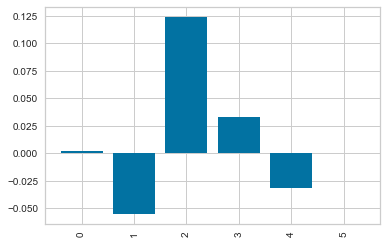

In [89]:
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(rotation='vertical')
pyplot.show()

In [90]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                count_k   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     4.618
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           0.000147
Time:                        11:41:55   Log-Likelihood:                 2001.9
No. Observations:                 427   AIC:                            -3990.
Df Residuals:                     420   BIC:                            -3961.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0041      0.000  

# CLUSTERING
Since nothing can be predicted. We will work with clustering.

In [91]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(data)

# print the cluster centers
clusters_coordinates = kmeans.cluster_centers_

print(clusters_coordinates )

[[ 5.33923390e-02  4.82240830e-02  1.86625575e-02  1.50080022e-02
  -8.44740690e-04  9.02329340e-01  4.73416463e-03]
 [ 1.16869376e-02  4.08264706e-02  1.35375453e-02  2.19298046e-02
  -9.45803047e-04 -8.48248632e-01  4.41557039e-03]
 [ 8.22849034e-01  4.03010917e-02  4.48014590e-03  1.40200184e-02
  -1.06157911e-03 -1.92379606e-02  4.30571483e-03]
 [ 6.16860956e-01  3.16650522e-02  3.66645521e-03  1.32606111e-02
  -8.70637954e-04 -7.19652608e-01  3.82220761e-03]
 [ 1.17722363e-01  6.14977156e-02  2.27867276e-02  2.07575667e-02
  -1.19179903e-03 -5.94723804e-01  3.58960788e-03]
 [ 4.73118303e-01  5.28933730e-02  1.92740424e-02  1.25403432e-02
  -8.49863453e-04  5.86201884e-01  3.85277331e-03]
 [ 3.07013336e-02  4.68536705e-02  1.61420869e-02  1.81037338e-02
  -9.96156941e-04 -9.63931650e-01  3.52067026e-03]
 [ 3.18434852e-01  5.08935253e-02  1.58396123e-02  1.21819437e-02
  -1.05239466e-03 -9.04464765e-01  4.75860845e-03]]


Text(0, 0.5, 'inertia')

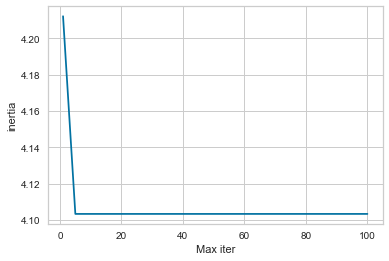

In [92]:
# I want to iterate over a range of mx_iter and for every value, I want to return the inertia
def get_kmeans_ineratia_varying_max_iter(max_iter):
    kmeans = KMeans(n_clusters=8,
                    random_state=1234,
                    n_init=3,
                    algorithm='elkan',
                    max_iter=max_iter,
                   )
    kmeans.fit(data)

    return kmeans.inertia_

max_iter_list = [1, 5, 10, 20, 30, 40, 50, 100]

plt.plot(max_iter_list,
         [get_kmeans_ineratia_varying_max_iter(x) for x in max_iter_list],
        )
plt.xlabel('Max iter')
plt.ylabel('inertia')

Text(0.5, 1.0, 'Elbow Method showing the optimal k within [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]')

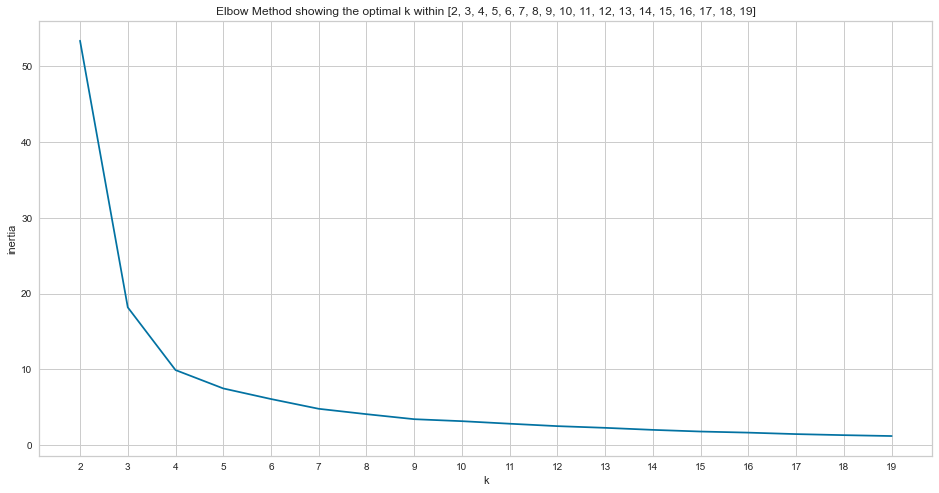

In [93]:
K = range(2,20)
inertias = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                   )
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title(f'Elbow Method showing the optimal k within {list(K)}')

Text(0.5, 1.0, 'Elbow Method showing the optimal k within [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]')

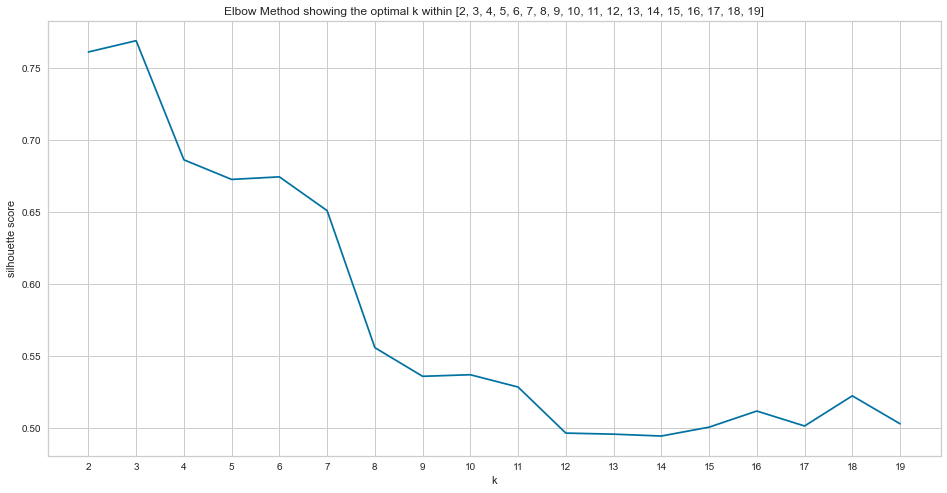

In [94]:
K = range(2,20)
silhouettes = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                   )
    kmeans.fit(data)
    silhouettes.append(silhouette_score(data,
                                     kmeans.predict(data)
                                    )
                   )
    


plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title(f'Elbow Method showing the optimal k within {list(K)}')

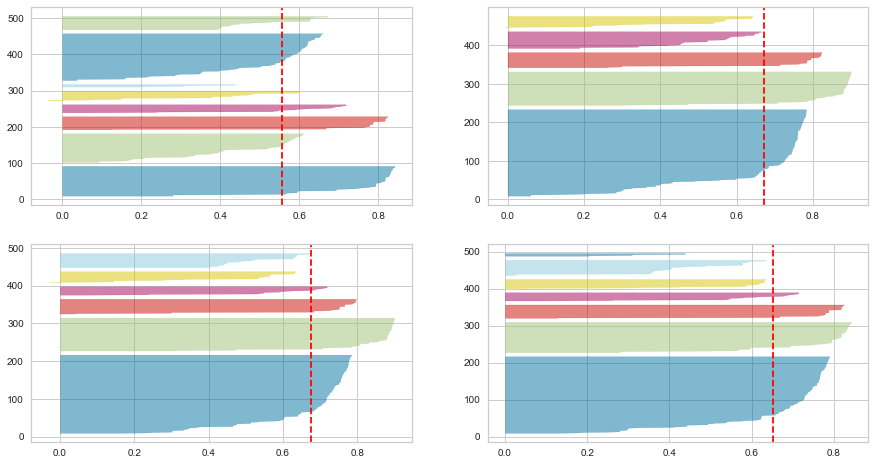

In [95]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in [5,6, 7,8]:
    km = KMeans(n_clusters=k,
                random_state=1234)
    q, mod = divmod(k, 2)    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-4][mod])
    visualizer.fit(data)

8 looks gr8. We will stick with that

In [96]:
kmeans = KMeans(n_clusters=8,
               random_state=1234)
kmeans.fit(data)

clusters = kmeans.predict(data)

In [97]:
clusters.shape

(427,)

In [98]:
reg_clustered = pd.DataFrame(data, columns = list_titles)

In [99]:
reg_clustered ['cluster_id'] = clusters

In [100]:
reg_clustered

,ethnic_kurdish,ln_gdppc_cons,divorce_rate_ma5,mosques_perk,fm_diff_educ,pol_attitude,count_k,cluster_id
0,0.406505,0.127318,0.044326,0.018443,-0.001912,-0.902945,0.009591,7
1,0.406334,0.129779,0.046557,0.018230,-0.002072,-0.902564,0.007113,7
2,0.406200,0.130956,0.049579,0.019466,-0.002038,-0.902268,0.004234,7
3,0.366494,0.119252,0.046926,0.017867,-0.001829,-0.920970,0.003257,7
4,0.366422,0.120006,0.049054,0.017931,-0.001840,-0.920788,0.006465,7
...,...,...,...,...,...,...,...,...
422,0.091594,0.033239,0.010654,0.013883,-0.000767,-0.798700,0.005690,1
423,0.091592,0.033649,0.011519,0.013787,-0.000758,-0.798682,0.005625,1
424,0.091589,0.034293,0.012676,0.013602,-0.000753,-0.798656,0.005550,1
425,0.091589,0.034107,0.013555,0.013433,-0.000703,-0.798654,0.008100,1


In [106]:
kmeans.cluster_centers_

array([[ 5.33923390e-02,  4.82240830e-02,  1.86625575e-02,
         1.50080022e-02, -8.44740690e-04,  9.02329340e-01,
         4.73416463e-03],
       [ 1.16869376e-02,  4.08264706e-02,  1.35375453e-02,
         2.19298046e-02, -9.45803047e-04, -8.48248632e-01,
         4.41557039e-03],
       [ 8.22849034e-01,  4.03010917e-02,  4.48014590e-03,
         1.40200184e-02, -1.06157911e-03, -1.92379606e-02,
         4.30571483e-03],
       [ 6.16860956e-01,  3.16650522e-02,  3.66645521e-03,
         1.32606111e-02, -8.70637954e-04, -7.19652608e-01,
         3.82220761e-03],
       [ 1.17722363e-01,  6.14977156e-02,  2.27867276e-02,
         2.07575667e-02, -1.19179903e-03, -5.94723804e-01,
         3.58960788e-03],
       [ 4.73118303e-01,  5.28933730e-02,  1.92740424e-02,
         1.25403432e-02, -8.49863453e-04,  5.86201884e-01,
         3.85277331e-03],
       [ 3.07013336e-02,  4.68536705e-02,  1.61420869e-02,
         1.81037338e-02, -9.96156941e-04, -9.63931650e-01,
         3.5206702

In [107]:
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns = list_titles)

In [108]:
cluster_centers_df

,ethnic_kurdish,ln_gdppc_cons,divorce_rate_ma5,mosques_perk,fm_diff_educ,pol_attitude,count_k
0,0.053392,0.048224,0.018663,0.015008,-0.000845,0.902329,0.004734
1,0.011687,0.040826,0.013538,0.021930,-0.000946,-0.848249,0.004416
2,0.822849,0.040301,0.004480,0.014020,-0.001062,-0.019238,0.004306
3,0.616861,0.031665,0.003666,0.013261,-0.000871,-0.719653,0.003822
4,0.117722,0.061498,0.022787,0.020758,-0.001192,-0.594724,0.003590
5,0.473118,0.052893,0.019274,0.012540,-0.000850,0.586202,0.003853
6,0.030701,0.046854,0.016142,0.018104,-0.000996,-0.963932,0.003521
7,0.318435,0.050894,0.015840,0.012182,-0.001052,-0.904465,0.004759


In [101]:
#cluster_centers_df['cluster_id'] = range(0,8)

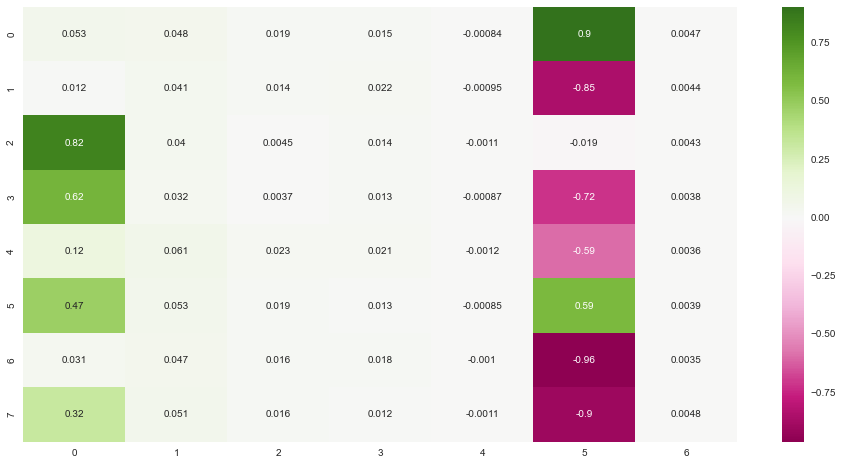

In [103]:
plt.figure(figsize=(16,8))
sns.heatmap(cluster_centers_df, cmap="PiYG", annot=True, center=0)
plt.show()

In [104]:
reg_sub_df =reg_clustered[['pol_attitude', 'count_k','cluster_id']]

<AxesSubplot:xlabel='pol_attitude', ylabel='count_k'>

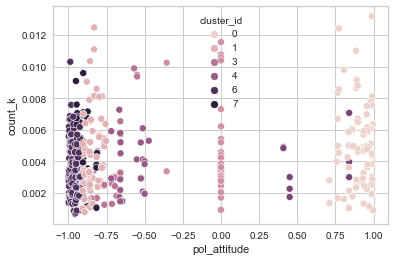

In [109]:
# plot datapoints
sns.scatterplot(data=reg_sub_df,
               x="pol_attitude",
               y="count_k",
               hue='cluster_id')

In [134]:
not_scaled = pd.read_csv('not_scaled.csv')

In [135]:
not_scaled

,prov_code,ethnic_kurdish,ln_gdppc_cons,divorce_rate_ma5,mosques_perk,fm_diff_educ,pol_attitude,count_k
0,1,13.370917,4.187798,1.458,0.606649,-0.062882,-29.70,0.009591
1,1,13.370917,4.270533,1.532,0.599866,-0.068188,-29.70,0.007113
2,1,13.370917,4.310695,1.632,0.640750,-0.067100,-29.70,0.004234
3,1,13.370917,4.350712,1.712,0.651852,-0.066711,-33.60,0.003257
4,1,13.370917,4.379060,1.790,0.654324,-0.067147,-33.60,0.006465
...,...,...,...,...,...,...,...,...
422,81,12.500000,4.536124,1.454,1.894688,-0.104740,-109.00,0.005690
423,81,12.500000,4.592223,1.572,1.881597,-0.103488,-109.00,0.005625
424,81,12.500000,4.680219,1.730,1.856333,-0.102752,-109.00,0.005550
425,81,12.500000,4.654947,1.850,1.833297,-0.095931,-109.00,0.008100


In [136]:
not_scaled.drop('prov_code', axis=1)

,ethnic_kurdish,ln_gdppc_cons,divorce_rate_ma5,mosques_perk,fm_diff_educ,pol_attitude,count_k
0,13.370917,4.187798,1.458,0.606649,-0.062882,-29.70,0.009591
1,13.370917,4.270533,1.532,0.599866,-0.068188,-29.70,0.007113
2,13.370917,4.310695,1.632,0.640750,-0.067100,-29.70,0.004234
3,13.370917,4.350712,1.712,0.651852,-0.066711,-33.60,0.003257
4,13.370917,4.379060,1.790,0.654324,-0.067147,-33.60,0.006465
...,...,...,...,...,...,...,...
422,12.500000,4.536124,1.454,1.894688,-0.104740,-109.00,0.005690
423,12.500000,4.592223,1.572,1.881597,-0.103488,-109.00,0.005625
424,12.500000,4.680219,1.730,1.856333,-0.102752,-109.00,0.005550
425,12.500000,4.654947,1.850,1.833297,-0.095931,-109.00,0.008100


In [137]:
list_titles1 = not_scaled.columns.values

In [144]:
kmeans = KMeans(n_clusters=8,
               random_state=1234)
kmeans.fit(not_scaled)

clusters = kmeans.predict(not_scaled)

In [145]:
not_reg_clustered = pd.DataFrame(not_scaled, columns = list_titles1)

In [146]:
not_reg_clustered ['cluster_id'] = clusters

In [150]:
not_reg_clustered

,prov_code,ethnic_kurdish,ln_gdppc_cons,divorce_rate_ma5,mosques_perk,fm_diff_educ,pol_attitude,count_k,cluster_id
0,1,13.370917,4.187798,1.458,0.606649,-0.062882,-29.70,0.009591,6
1,1,13.370917,4.270533,1.532,0.599866,-0.068188,-29.70,0.007113,6
2,1,13.370917,4.310695,1.632,0.640750,-0.067100,-29.70,0.004234,6
3,1,13.370917,4.350712,1.712,0.651852,-0.066711,-33.60,0.003257,6
4,1,13.370917,4.379060,1.790,0.654324,-0.067147,-33.60,0.006465,6
...,...,...,...,...,...,...,...,...,...
422,81,12.500000,4.536124,1.454,1.894688,-0.104740,-109.00,0.005690,5
423,81,12.500000,4.592223,1.572,1.881597,-0.103488,-109.00,0.005625,5
424,81,12.500000,4.680219,1.730,1.856333,-0.102752,-109.00,0.005550,5
425,81,12.500000,4.654947,1.850,1.833297,-0.095931,-109.00,0.008100,5


In [147]:
kmeans.cluster_centers_

array([[ 3.39729730e+01,  6.65899156e+01,  3.93887187e+00,
         5.98810811e-01,  1.52555138e+00, -1.11109046e-01,
        -9.83145946e+01,  3.75990493e-03],
       [ 5.80000000e+01,  4.20428147e+00,  4.59776108e+00,
         1.80745946e+00,  1.50337371e+00, -7.82886576e-02,
         8.54962162e+01,  4.77235593e-03],
       [ 1.93495146e+01,  6.10442726e+00,  4.54003554e+00,
         1.52275728e+00,  1.89982378e+00, -9.53518384e-02,
        -9.40184466e+01,  3.96832010e-03],
       [ 5.13250000e+01,  7.84617990e+01,  3.86811063e+00,
         4.35250000e-01,  1.31660562e+00, -1.02306401e-01,
         1.88000000e+00,  4.15838592e-03],
       [ 7.46111111e+01,  7.82251267e+00,  4.29492122e+00,
         1.55588889e+00,  1.82496973e+00, -9.56130491e-02,
        -5.47088889e+01,  4.11547989e-03],
       [ 5.42727273e+01,  3.44397756e+00,  4.42560064e+00,
         1.44949091e+00,  1.70363209e+00, -1.02794361e-01,
        -1.09978182e+02,  3.90782053e-03],
       [ 2.64838710e+01,  6.411058

In [148]:
cluster_centers_df1 = pd.DataFrame(kmeans.cluster_centers_, columns = list_titles1)

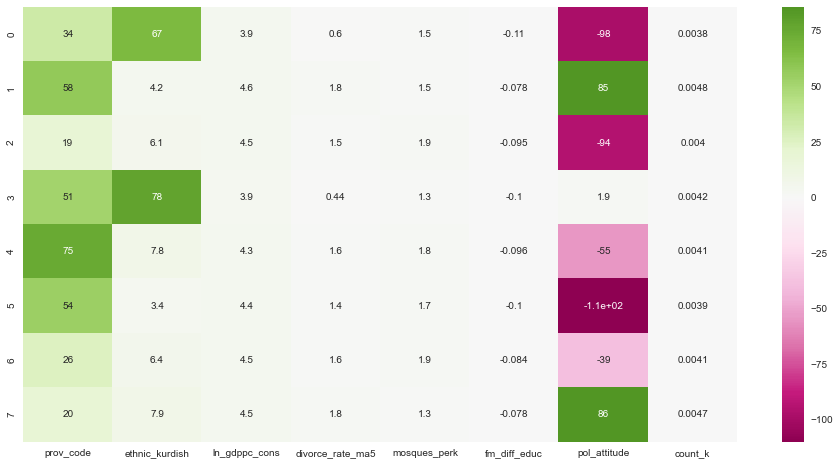

In [149]:
plt.figure(figsize=(16,8))
sns.heatmap(cluster_centers_df1, cmap="PiYG", annot=True, center=0)
plt.show()